In [264]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [265]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [266]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from lightgbm import early_stopping, log_evaluation

In [267]:
df_train = pd.read_csv('Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [268]:
df_test = pd.read_csv('Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [269]:
# Lets visualize the data to better understand it.

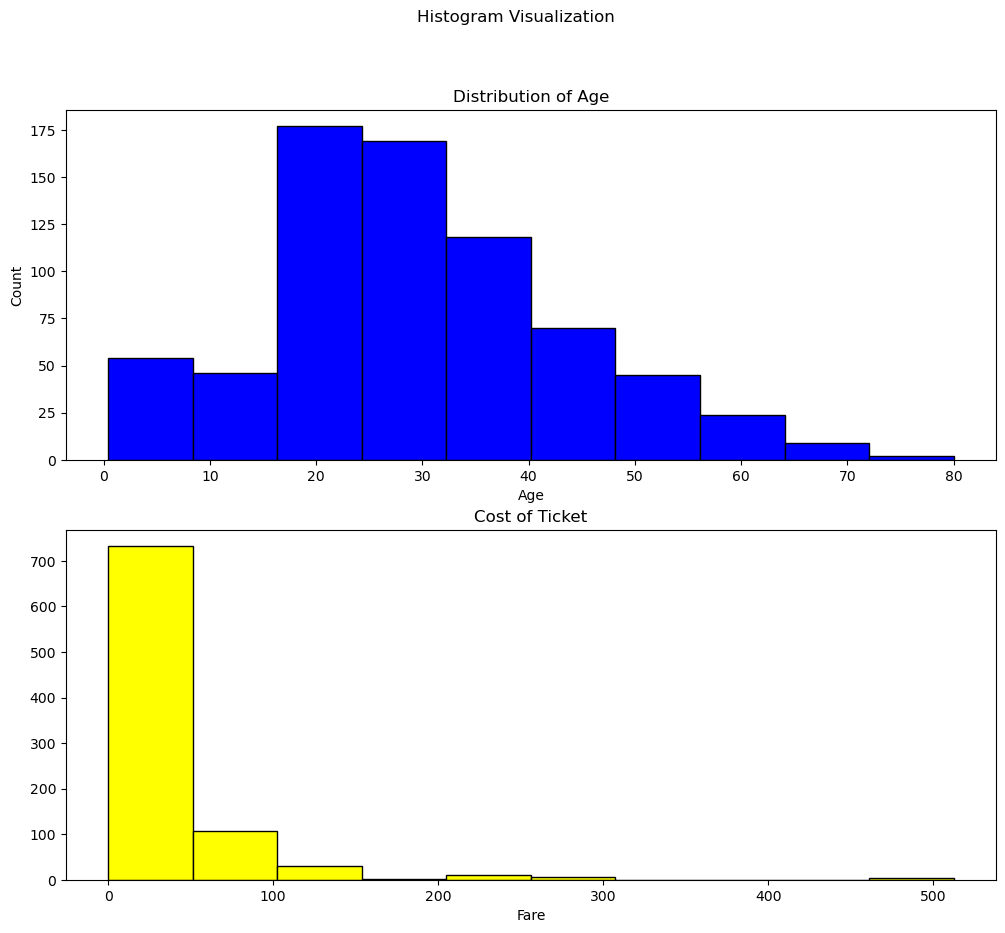

In [270]:
fig,axes=plt.subplots(2,1,figsize=(12,10))
plt.suptitle('Histogram Visualization')

axes[0].hist(data=df_train,x = 'Age',color='blue',edgecolor='black')
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

axes[1].hist(df_train['Fare'],bins = 10,color='yellow',edgecolor='black')
axes[1].set_title('Cost of Ticket')
axes[1].set_xlabel("Fare")

plt.show()

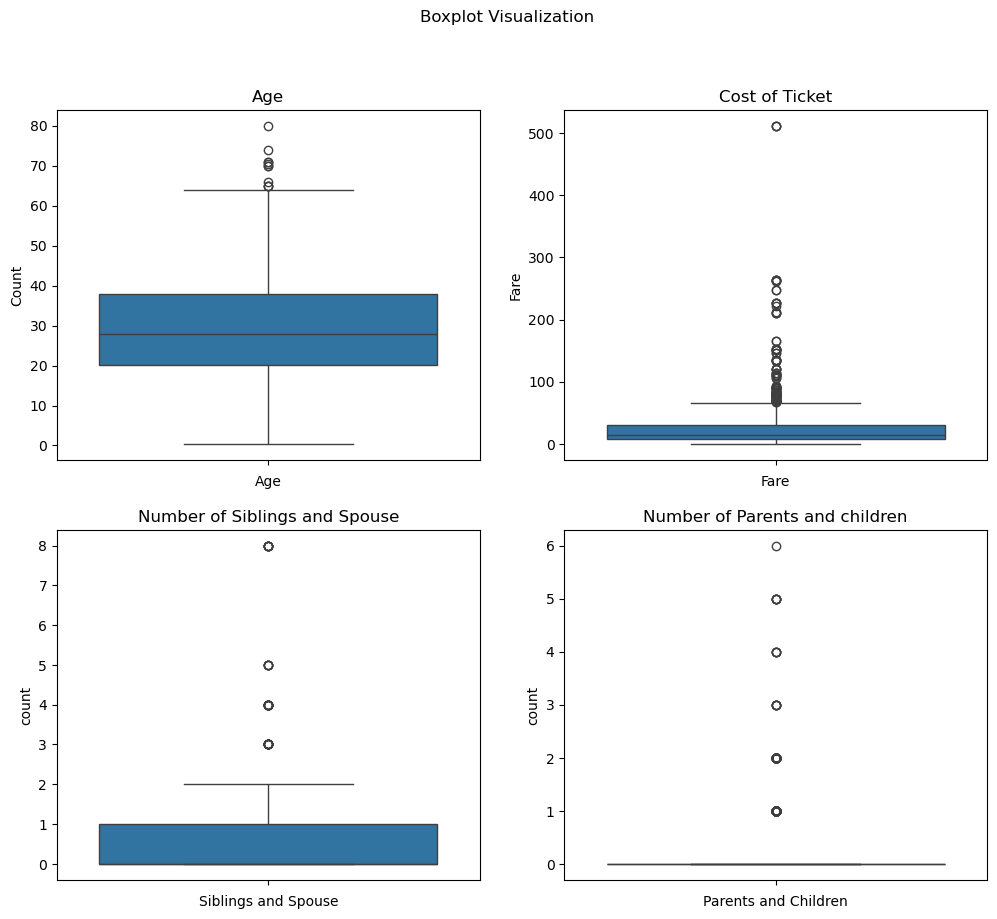

In [271]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
plt.suptitle('Boxplot Visualization')

sns.boxplot(df_train['Age'],ax=axes[0,0])
axes[0,0].set_title("Age")
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')

sns.boxplot(df_train['Fare'],ax=axes[0,1])
axes[0,1].set_title('Cost of Ticket')
axes[0,1].set_xlabel("Fare")

sns.boxplot(df_train['SibSp'],ax=axes[1,0])
axes[1,0].set_title('Number of Siblings and Spouse')
axes[1,0].set_xlabel('Siblings and Spouse')
axes[1,0].set_ylabel('count')

sns.boxplot(df_train['Parch'],ax=axes[1,1])
axes[1,1].set_title('Number of Parents and children')
axes[1,1].set_xlabel('Parents and Children')
axes[1,1].set_ylabel('count')

plt.show()

Text(0.5, 1.0, 'Parents and Children')

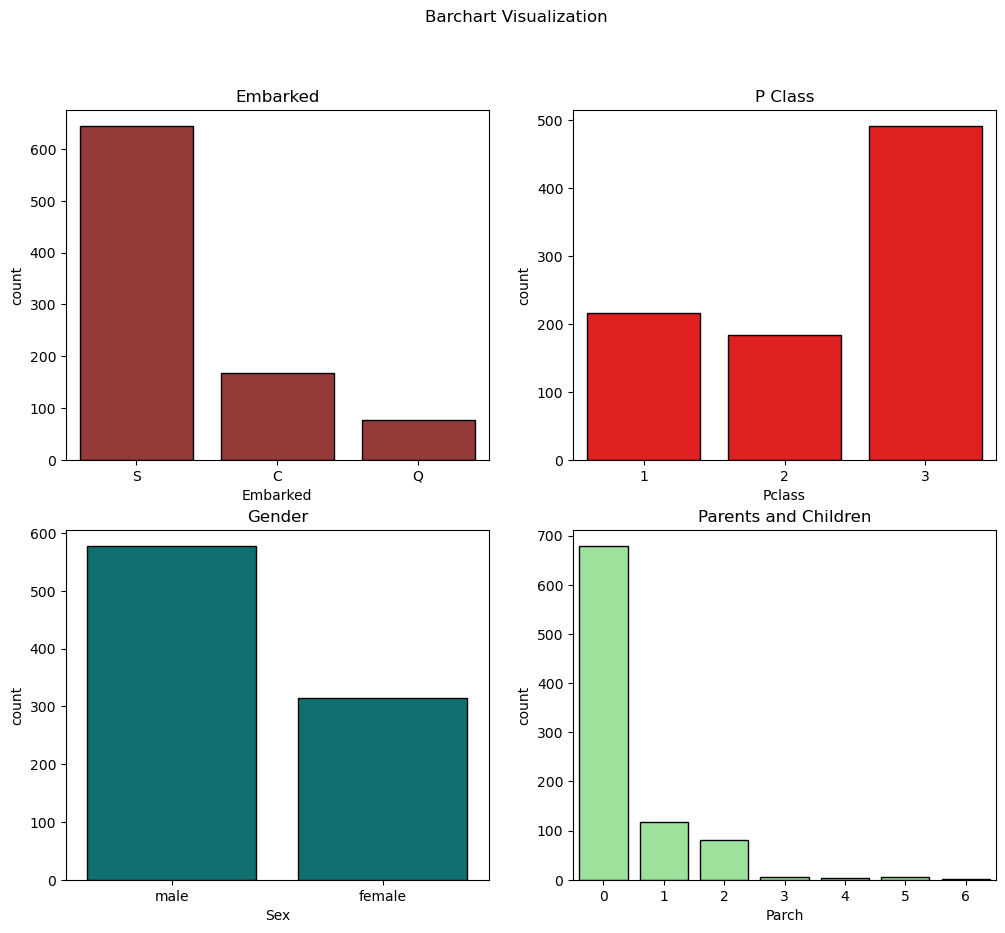

In [272]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
plt.suptitle('Barchart Visualization')

sns.barplot(df_train['Embarked'].value_counts(),ax=axes[0,0],color='brown',edgecolor='black')
axes[0,0].set_title('Embarked')

sns.barplot(df_train['Pclass'].value_counts(),ax=axes[0,1],color='red',edgecolor='black')
axes[0,1].set_title('P Class')

sns.barplot(df_train['Sex'].value_counts(),ax=axes[1,0],color='teal',edgecolor='black')
axes[1,0].set_title('Gender')

sns.barplot(df_train['Parch'].value_counts(),ax=axes[1,1],color='lightgreen',edgecolor='black')
axes[1,1].set_title('Parents and Children')

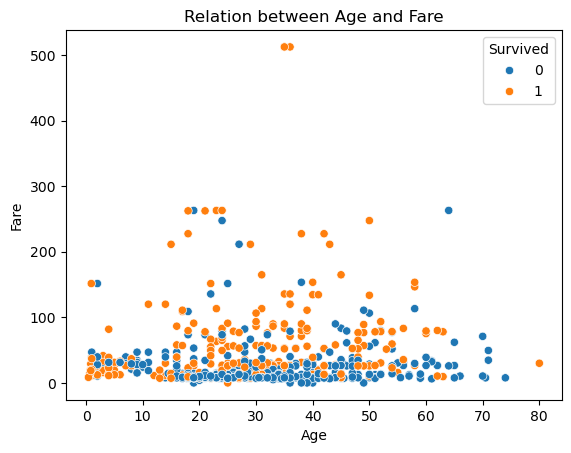

In [273]:
sns.scatterplot(x='Age',y='Fare',data=df_train,hue='Survived')
plt.title('Relation between Age and Fare')
plt.show()

In [274]:
# Now lets find for missing values and duplicates in the dataset.

In [275]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [276]:
# Looks like 'Cabin' and 'Age ' column have missing values. We can imputate these missing values.

In [277]:
df1 = df_train.copy()
df1['Cabin'].fillna(df1['Cabin'].mode()[0],inplace=True)
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)
df1.isna().sum().sum()

0

In [278]:
# we are now done the treating missing values. Lets encode Categorical variables.

In [279]:
le = LabelEncoder()
df1['Embarked'] = le.fit_transform(df1['Embarked'])
df1['Sex'] = le.fit_transform(df1['Sex'])
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


In [416]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [281]:
df2 = df_test.copy()
 # Lets clean the Test data. However we will not be using this test data as it does not contain original predicted values.
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
df2['Cabin'].fillna(df2['Cabin'].mode()[0],inplace=True)
df2['Fare'].fillna(df2['Fare'].mean(),inplace=True)
df2.isna().sum().sum()

0

In [282]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [283]:
df2['Embarked'] = le.fit_transform(df2['Embarked'])
df2['Sex'] = le.fit_transform(df2['Sex'])
X2 = df2[['Pclass','Sex','Age','Parch','Fare','Embarked']]
X2

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,1,34.50000,0,7.8292,1
1,3,0,47.00000,0,7.0000,2
2,2,1,62.00000,0,9.6875,1
3,3,1,27.00000,0,8.6625,2
4,3,0,22.00000,1,12.2875,2
...,...,...,...,...,...,...
413,3,1,30.27259,0,8.0500,2
414,1,0,39.00000,0,108.9000,0
415,3,1,38.50000,0,7.2500,2
416,3,1,30.27259,0,8.0500,2


In [284]:
# Lets split dataset into independent and dependent variables.
X = df1[['Pclass','Sex','Age','Parch','Fare','Embarked']]
y = df1['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=897)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [285]:
xgb_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,gamma=10,reg_lambda=5)
xgb_model.fit(X_train,y_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [286]:
accuracy = accuracy_score(y_test, y_test_pred_xgb)
precision = precision_score(y_test, y_test_pred_xgb)
recall = recall_score(y_test, y_test_pred_xgb)
f1 = f1_score(y_test, y_test_pred_xgb)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"XGBoost Test Accuracy: {accuracy:.2f}")

Precision: 0.80
Recall: 0.73
F1 Score: 0.76
XGBoost Test Accuracy: 0.84


In [287]:
# lets use Grid Search cross validation to find best parameters for the model and to improve performance.

In [288]:
param_grid = {
    "n_estimators": [50,100,200],
    "learning_rate": [0.01,0.1,0.2],
    "gamma": [5,10,15],
}

In [289]:
XGB_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, scoring='accuracy',cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [5, 10, 15],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [290]:
grid_search.best_params_

{'gamma': 5, 'learning_rate': 0.1, 'n_estimators': 50}

In [291]:
y2_test_pred = xgb_model.predict(X2)

In [292]:
df2['Survived_predicted'] = y2_test_pred
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_predicted
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,2,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,1,0
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,2,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,2,0
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,2,0


In [293]:
# Our model is performing really well.

In [294]:
train_data = lgb.Dataset(X_train,label=y_train)
validation_data = lgb.Dataset(X_test,label=y_test,reference=train_data)

In [295]:
params={'objective':"binary",
        'metric':'binary_logloss',
        'learning_rate': 0.05,
        'num_leaves':31}

In [296]:
lgb_model = lgb.train(params,
                      train_data,
                      num_boost_round=200,
                      valid_sets=[validation_data],
                      callbacks=[lgb.early_stopping(10),
                                 lgb.log_evaluation(period=0)])

[LightGBM] [Info] Number of positive: 278, number of negative: 434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390449 -> initscore=-0.445423
[LightGBM] [Info] Start training from score -0.445423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [297]:
Y_pred_test = lgb_model.predict(X_test)
Y_pred_test

array([0.1095685 , 0.05434199, 0.942848  , 0.15295953, 0.36633424,
       0.13082354, 0.15138508, 0.92191612, 0.49798757, 0.07644846,
       0.55143771, 0.89947368, 0.94148042, 0.24499297, 0.06345296,
       0.66758014, 0.07761125, 0.59927103, 0.12277621, 0.06043405,
       0.08990298, 0.24497256, 0.35409606, 0.92352043, 0.19353614,
       0.13162406, 0.05108614, 0.31142676, 0.09786171, 0.37194262,
       0.1421649 , 0.8728259 , 0.52656979, 0.32896317, 0.35339302,
       0.03362648, 0.06345296, 0.34302482, 0.15890561, 0.36224723,
       0.94262949, 0.09922914, 0.40837281, 0.40408263, 0.24381808,
       0.12347277, 0.09382244, 0.09847685, 0.08990298, 0.8617277 ,
       0.15712791, 0.10886873, 0.8617277 , 0.20417692, 0.87139628,
       0.13777508, 0.12138311, 0.08986938, 0.94262949, 0.8617277 ,
       0.08261858, 0.79146327, 0.06354337, 0.23506169, 0.4336022 ,
       0.262226  , 0.8617277 , 0.86782971, 0.53064359, 0.05765233,
       0.12323076, 0.39402636, 0.06637289, 0.28287413, 0.95192

In [298]:
accuracy_score=accuracy_score(y_test,Y_pred_test.round())
accuracy_score

0.8324022346368715

In [299]:
precision_score = precision_score(y_test,Y_pred_test.round())
precision_score

0.8148148148148148

In [300]:
recall_score = recall_score(y_test, Y_pred_test.round())
recall_score

0.6875

In [338]:
f1_score = f1_score(y_test, Y_pred_test.round())
f1_score

0.7457627118644068

In [372]:
scores_df = pd.DataFrame({'accuracy_XGB':accuracy,
                          "precision_XGB":precision,
                          "recall_XGB":recall,
                          "f1_score_XGB":f1,
                          'accuracy_LGBM':accuracy_score,
                          'precision_LGBM':precision_score,
                          'recall_LGBM':recall_score,
                          'f1_score_LGBM':f1_score},index=[0])
scores_df

,accuracy_XGB,precision_XGB,recall_XGB,f1_score_XGB,accuracy_LGBM,precision_LGBM,recall_LGBM,f1_score_LGBM
0,0.837989,0.79661,0.734375,0.764228,0.832402,0.814815,0.6875,0.745763


<Axes: >

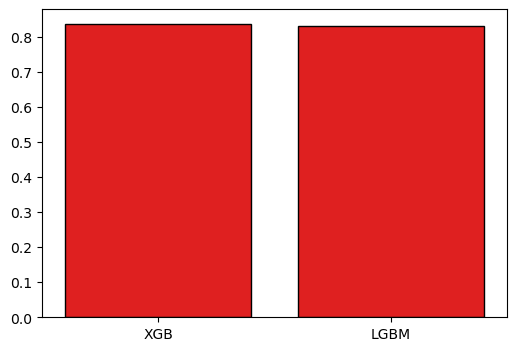

In [408]:
x = ['XGB', 'LGBM']
y = [scores_df['accuracy_XGB'][0], scores_df['accuracy_LGBM'][0]]

plt.figure(figsize=(6, 4))
sns.barplot(x=x, y=y,color='red',edgecolor='black')

In [ ]:
# XGB has slightly higher accuracy score than LGBM.

<Axes: >

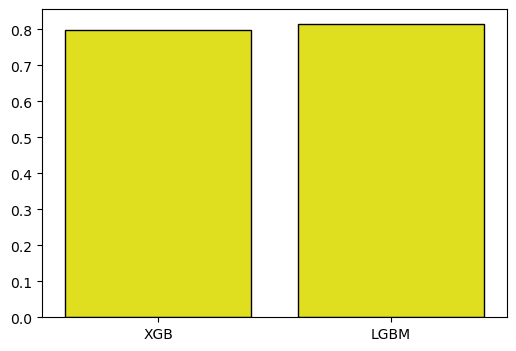

In [410]:
x = ['XGB', 'LGBM']
y = [scores_df['precision_XGB'][0], scores_df['precision_LGBM'][0]]

plt.figure(figsize=(6, 4))
sns.barplot(x=x, y=y,color='yellow',edgecolor='black')

In [ ]:
# LGBM has slightly higher precision than XGB.

<Axes: >

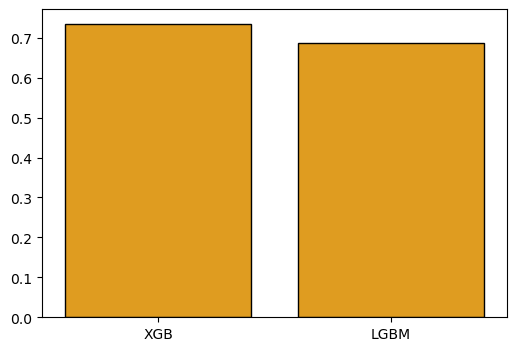

In [412]:
x = ['XGB', 'LGBM']
y = [scores_df['recall_XGB'][0], scores_df['recall_LGBM'][0]]

plt.figure(figsize=(6, 4))
sns.barplot(x=x, y=y,color='orange',edgecolor='black')

In [406]:
# However recall is higher in XGB than that of LGBM.

<Axes: >

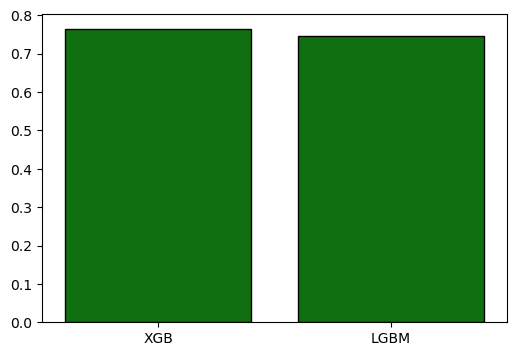

In [414]:
x = ['XGB', 'LGBM']
y = [scores_df['f1_score_XGB'][0], scores_df['f1_score_LGBM'][0]]

plt.figure(figsize=(6, 4))
sns.barplot(x=x, y=y,color='green',edgecolor='black')